In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [104]:
df = pd.read_csv("/Users/purva/Desktop/Data Science Boot Camp/examples/avocado 2.csv")
org = df.loc[df['type']=='organic']

In [109]:
org.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


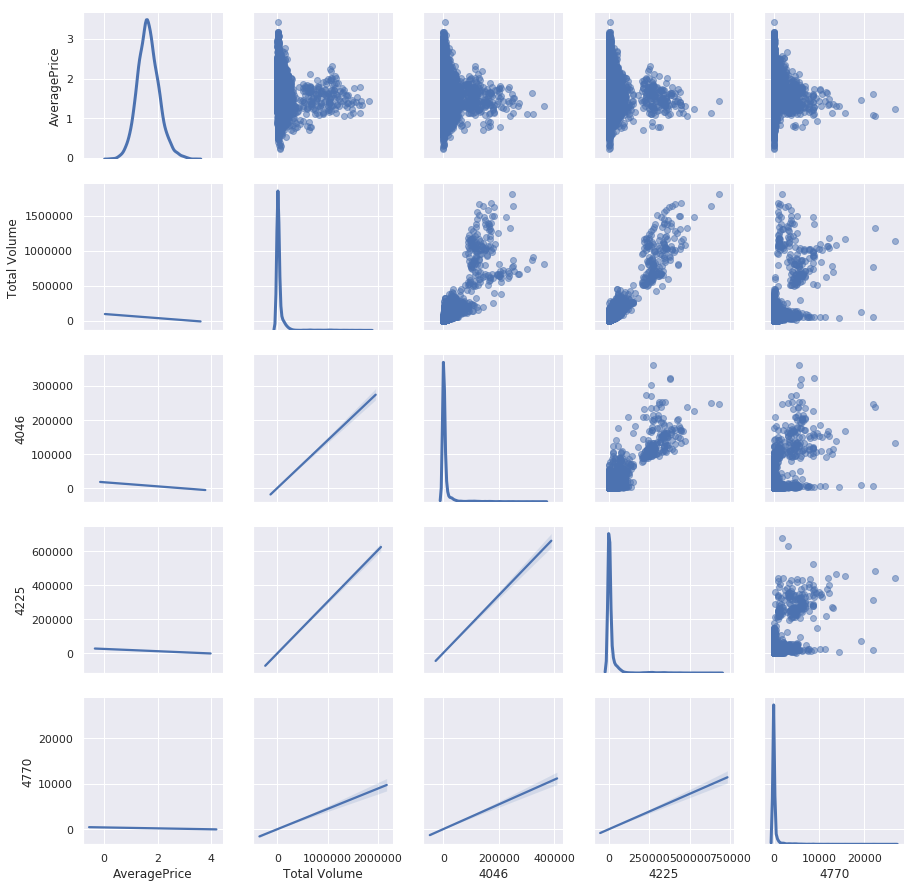

In [103]:
df1 = df.loc[:,'Date':'region']
# Make a copy of the data to add jitter to and plot.
df_jittered = org.loc[:, 'AveragePrice':'4770'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238 

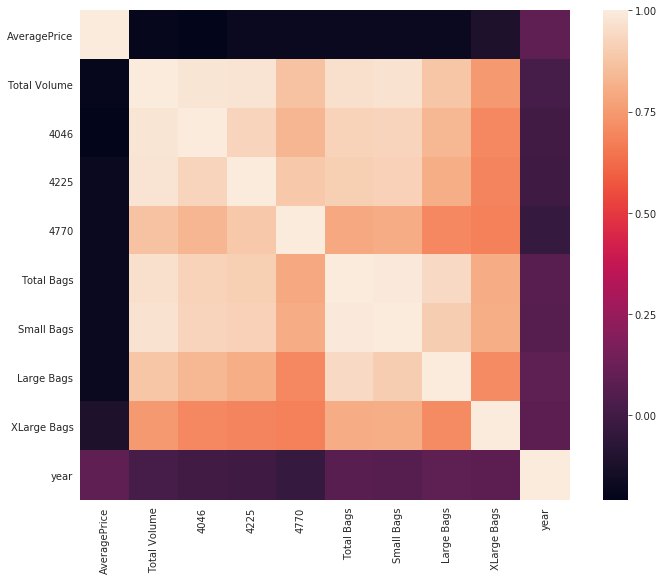

In [35]:
sns.set_style("white")
corrmat = df1.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True)
plt.show()

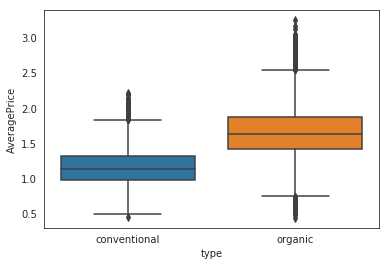

In [36]:
sns.boxplot(df['type'], df['AveragePrice'], data=df)
plt.show()

### Feature creations

## 1. Feature creation by dealing with non-normality

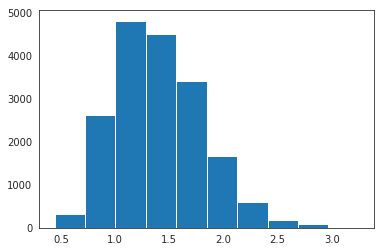

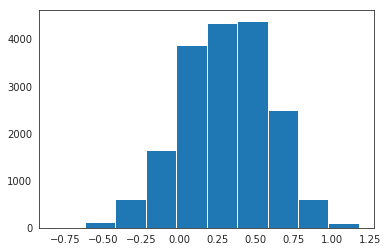

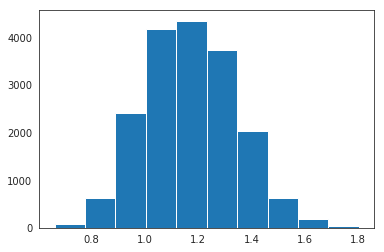

In [45]:
plt.hist(df.AveragePrice.dropna())
plt.show()

plt.hist(np.log(df.AveragePrice.dropna()))
plt.show()
plt.hist(np.sqrt(df.AveragePrice.dropna()))
plt.show()

## 2. Feature by combining highly correlated data

In [47]:
features = pd.get_dummies(df['AveragePrice'])
features['sqrt_AveragePrice']=np.sqrt(df['AveragePrice'])


In [52]:
mean1 = df[['4046','4225','4770']].mean(axis=0)
stddev1 = df[['4046','4225','4770']].std(axis=0)
features['4046_4225_4770'] = ((df[['4046','4225','4770']]-mean1)/stddev1).mean(axis=1)

## 3. Creating Linear relationships

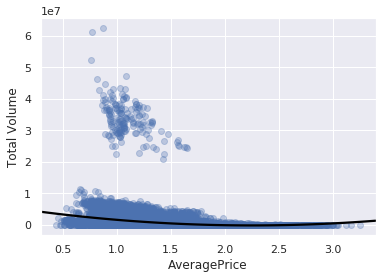

In [65]:
sns.regplot(
    df['AveragePrice'],
    y=df['Total Volume'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['square_totalVol'] = df['Total Volume']*df['Total Volume']

## 4. Feature creation by changing variable type

In [75]:
features['avgprice_2$'] = np.where(df['AveragePrice'] > 2,1,0)

## 5. Feature creation by changing variable type

In [76]:
features['totalvol_100K'] = np.where(df['Total Volume'] > 100000,1,0)

## 6. Creating features of unique values

In [77]:
np.unique(df['region'])

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

## 7. Features by multiplying two variables

In [79]:
features['total_revenue']= df['Total Volume'] * df['AveragePrice']

##  8. Feature by grouping dates according to month and year

In [89]:
features['month']= pd.to_datetime(df['Date']).dt.strftime('%B - %Y')

In [ ]:
features['percent_4026'] = df['4026']/df['Total Volume']
features['percent_4225'] = df['4026']/df['Total Volume']
features['percent_4770'] = df['4026']/df['Total Volume']

## Feature selection

1. total_revenue - This feature can give more information which is total revenue based on two variables total vol and avg price
2. month - This can be useful to analyse trend in avocado production from month to month.
3. 4026_4225_4770 - this feature can be useful as it is combining data of 3 variables which is redundant
4. totalvol_100K - This feature can be useful to identify the high volume and perform their analysis
5. percent_4770, percent_4225, percent_4026- This feature can be useful to perform anslysis the variation in percent of three types of avocadoes